In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\sinch\OneDrive\Desktop\data analytics t\Excel\ai_assistant_usage_student_life.csv")

In [3]:
df.isnull().sum()

SessionID              0
StudentLevel           0
Discipline             0
SessionDate            0
SessionLengthMin      14
TotalPrompts           8
TaskType               0
AI_AssistanceLevel     7
FinalOutcome           0
UsedAgain              0
SatisfactionRating    11
dtype: int64

In [4]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [5]:
df.isnull().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [6]:
df['SessionDate'] = pd.to_datetime(df['SessionDate'], dayfirst=True)

In [7]:
df['Month'] = df['SessionDate'].dt.to_period('M')
df['Month']


0       2024-11
1       2024-08
2       2025-01
3       2025-05
4       2025-03
         ...   
9995    2024-07
9996    2024-11
9997    2024-09
9998    2024-10
9999    2025-04
Name: Month, Length: 10000, dtype: period[M]

In [8]:
df.describe()

,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2024-12-23 09:05:36.960000,19.854336,5.606886,3.479736,3.417529
min,2024-06-24 00:00:00,0.030000,1.000000,1.000000,1.000000
25%,2024-09-20 00:00:00,9.637500,2.000000,3.000000,2.600000
50%,2024-12-25 00:00:00,16.680000,4.000000,4.000000,3.500000
75%,2025-03-27 00:00:00,26.652500,8.000000,4.000000,4.400000
max,2025-06-24 00:00:00,110.810000,39.000000,5.000000,5.000000
std,NaN,13.892272,4.647079,0.991117,1.142646


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SessionID           10000 non-null  object        
 1   StudentLevel        10000 non-null  object        
 2   Discipline          10000 non-null  object        
 3   SessionDate         10000 non-null  datetime64[ns]
 4   SessionLengthMin    10000 non-null  float64       
 5   TotalPrompts        10000 non-null  float64       
 6   TaskType            10000 non-null  object        
 7   AI_AssistanceLevel  10000 non-null  float64       
 8   FinalOutcome        10000 non-null  object        
 9   UsedAgain           10000 non-null  bool          
 10  SatisfactionRating  10000 non-null  float64       
 11  Month               10000 non-null  period[M]     
dtypes: bool(1), datetime64[ns](1), float64(4), object(5), period[M](1)
memory usage: 869.3+ KB


In [10]:
correlation_matrix = df[['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    SessionLengthMin  TotalPrompts  AI_AssistanceLevel  \
SessionLengthMin            1.000000      0.901804           -0.006860   
TotalPrompts                0.901804      1.000000           -0.005836   
AI_AssistanceLevel         -0.006860     -0.005836            1.000000   
SatisfactionRating         -0.011021     -0.009131            0.774731   

                    SatisfactionRating  
SessionLengthMin             -0.011021  
TotalPrompts                 -0.009131  
AI_AssistanceLevel            0.774731  
SatisfactionRating            1.000000  


In [11]:
print("\nAverage Satisfaction by Task Type:")
print(df.groupby('TaskType')['SatisfactionRating'].mean())

print("\nAverage Assistance Level by Discipline:")
print(df.groupby('Discipline')['AI_AssistanceLevel'].mean())


Average Satisfaction by Task Type:
TaskType
Brainstorming    3.395625
Coding           3.455622
Homework Help    3.430331
Research         3.338655
Studying         3.405646
Writing          3.408800
Name: SatisfactionRating, dtype: float64

Average Assistance Level by Discipline:
Discipline
Biology             3.492428
Business            3.479035
Computer Science    3.476817
Engineering         3.468531
History             3.505999
Math                3.475021
Psychology          3.460141
Name: AI_AssistanceLevel, dtype: float64


In [12]:
sns.set(style="whitegrid")

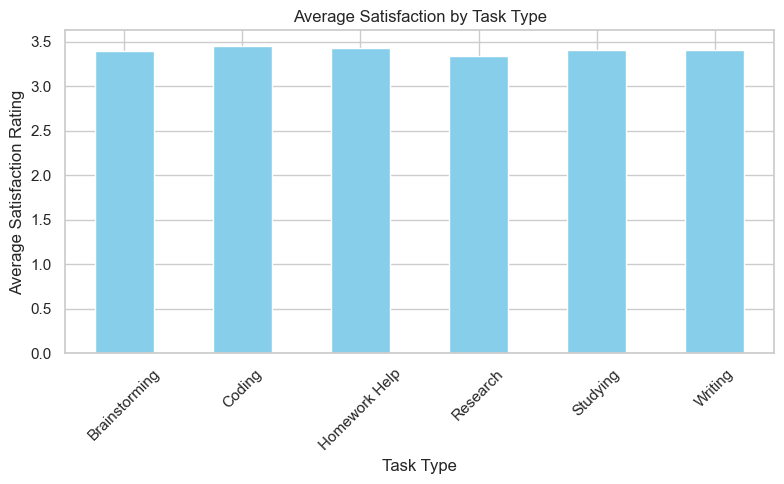

In [13]:
plt.figure(figsize=(8, 5))
df.groupby('TaskType')['SatisfactionRating'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Satisfaction by Task Type')
plt.ylabel('Average Satisfaction Rating')
plt.xlabel('Task Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

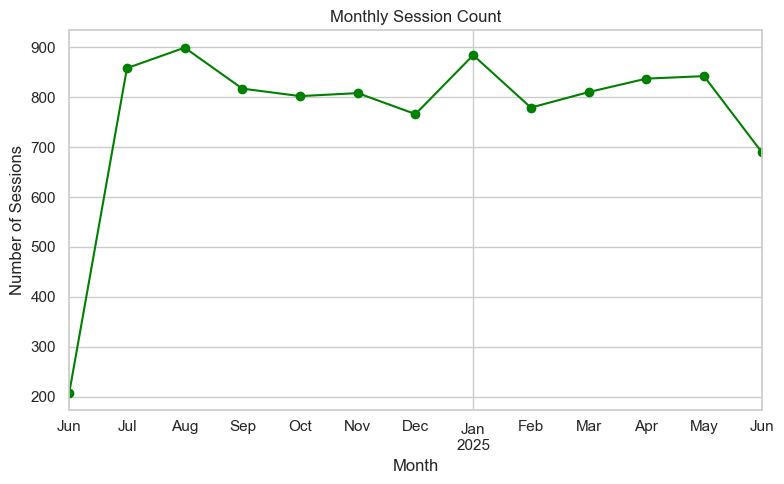

In [14]:
plt.figure(figsize=(8, 5))
df['Month'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title('Monthly Session Count')
plt.ylabel('Number of Sessions')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


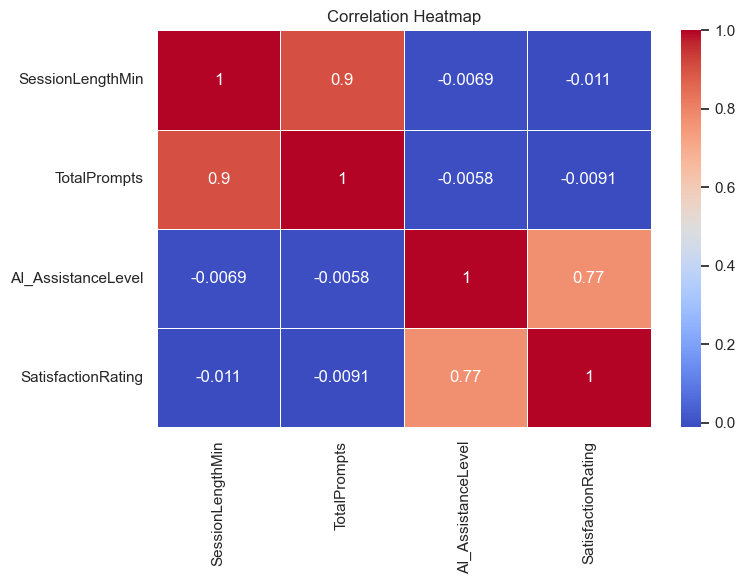

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [16]:
df.to_csv("outcome.csv",index=False)